# Starting Young and Professional Success for Tennis Players  

## 1) Introduction

Our study will analyze the <b>UltimateTennisStatistics</b>  dataset, which provides statistics of the top 500 male tennis players with their personal information and results from previous matches, records achieved, and Elo ratings. 

The question we plan to address is:<br>
              <b> “At what age did a player who ranked highly and won more prize money turn professional?” </b> <br>
    
Our hypothesis:<br>
<b>We hypothesize that a player who obtained higher ranks and won more prize money, turned professional at a younger age.</b> <br>
Note: In this context, ”turning professional” refers to a player deciding to pursue tennis as a full-time professional career (Barnes, 2020).
 
We will perform a <b>classification</b> study on this dataset to predict the variable <u>“Age Turned Pro”</u>, which is used as a <b>categorical variable (label)</b>. The variables, “Prize Money”, “Best Rank”, “Current Rank”, “Highest Elo Value”, and “Current Elo Value”, will serve as determinants of success, and will be used as <b>features</b> to predict the label “Age Turned Pro”. 

Background Information:<br>
Prize money rewards depend on how high a player’s ranking is and equate as income, enabling the players to pursue tennis full time as a career if they are capable of claiming enough victories (Barnes, 2020). The Elo Value is an algorithm used to forecast the outcomes of future tournaments based on skills demonstrated by players from previous matches. Elo ratings are also established by how high of a rank the players hold which is earned by previous tournament wins (Jeff, 2019). 




|  <p align="center">Variables</p>         |<p align="center"> Scale/Unit</p> | <p align="center">Column Name</p>     |<p align="left">Context</p>                                                                              |
|-------------------|------------|------------------|---------------------------------------------------------------------------------------|
|<p align="left">Prize Money </p>      | <p align="left">USD</p>        | <p align="left">Prize.Money.Val</p> | <p align="left">The US dollar value of prize money</p>                                                     |
|<p align="left"> Best Rank </p>        | <p align="left">n/a</p>        | <p align="left">Best.Rank.Val</p>    | <p align="left">Best rank over the player’s career from The Association of Tennis Professionals (ATP)</p>   |
| <p align="left">Current Rank</p>     | <p align="left">n/a</p>       | <p align="left">Current.Rank.Val</p> | <p align="left">Current rank over the player’s career among other tennis players</p>                        |
| <p align="left">Highest Elo Rank</p> | <p align="left">n/a</p>         | <p align="left">Peak.Elo.Val</p>    | <p align="left">Highest Elo Value obtained, elo value being algorithm predicting future performance</p>  |
| <p align="left">Current Elo Value</p> | <p align="left">n/a</p>       | <p align="left">Current.Elo.Val</p>  | <p align="left">Current Elo Value, elo value being algorithm predicting</p>  
| <p align="left">Age Turned Pro </p> | <p align="left">year</p>       | <p align="left">Age.Turned.Pro</p>  | <p align="left">The age at which a player turned professional as per the ATP</p>                                 ||

<i>Table 1.0.0 A list of variables including the predictors and the label used in this study </i>

In [1]:
#Loading libraries
library(dplyr)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(gridExtra)

#Setting seeds for consistency
set.seed(1)

Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.1     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ b

## 2) Methods & Results

First, we loaded the Ultimate Tennis Data into R (UltimateTennisStatistics, 2020). 

In [2]:
#Reading data into R
player_data <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS") 

#Removed spaces from column names 
colnames(player_data) <- make.names(colnames(player_data))

#Selecting columns needed
player_data_cleaned_columns <- player_data %>%
                                 select( Age, Prize.Money, Best.Rank, Current.Rank,  Peak.Elo.Rating, 
                                        Current.Elo.Rank, Turned.Pro) 

head(player_data_cleaned_columns)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



Age,Prize.Money,Best.Rank,Current.Rank,Peak.Elo.Rating,Current.Elo.Rank,Turned.Pro
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
26 (25-04-1993),NA,363 (04-11-2019),378 (97),NA,NA,NA
18 (22-12-2001),"$59,040",316 (14-10-2019),326 (119),NA,NA,NA
32 (03-11-1987),"US$3,261,567",44 (14-01-2013),178 (280),1886 (06-02-2012),144 (1764),2005
21 (29-05-1998),"$374,093",130 (10-04-2017),236 (199),NA,NA,NA
27 (21-10-1992),"US$6,091,971",17 (11-01-2016),183 (273),2037 (01-02-2016),100 (1826),2008
22 (11-02-1997),"$1,517,157",31 (20-01-2020),31 (1398),1983 (20-01-2020),33 (1983),2015


<i>Table 2.1.0 : Reading the dataset from the web, with preliminary selected columns</i>

### 1.Data Wrangling
In order to proceed with analysis, we must carefully tidy the data so that we can manipulate it later on. 

The columns needed were separated, ensuring that each row corresponds to one observation, each column a single variable, and each cell a single value.

In [3]:
# Tidying the cells, separating by delimiters
player_data_cleaned_columns <- player_data_cleaned_columns %>%
            separate(col = Age,            
                      into = c("Age.Val","Age.DOB"),
                      sep = " ") %>% # separate the Age column into actual age value, and DOB by the space
            separate(col = Age.DOB, 
                      into = c("DOB.Day","DOB.Month", "DOB.Yr"), # separate DOB into day, month, year by the dash
                      sep = "-") %>%
            separate(col = Current.Rank, 
                      into = c("Current.Rank.Val","Current.Rank.Score"),
                      sep = " ") %>%
             separate(col = Best.Rank, 
                      into = c("Best.Rank.Val","Best.Rank.Date"),
                      sep = " ") %>%
             separate(col = Current.Elo.Rank, 
                      into = c("Current.Elo.Val","Current.Elo.Score"),
                      sep = " ") %>%
            separate(col = Peak.Elo.Rating, 
                      into = c("Peak.Elo.Val","Peak.Elo.Date"),
                      sep = " ") %>%
            separate(col = Prize.Money, 
                      into = c("Prize.Money.Curr","Prize.Money.Val"),
                      sep = "\\$")  

head(player_data_cleaned_columns)


Warning message:
“Expected 2 pieces. Additional pieces discarded in 2 rows [146, 441].”


Age.Val,DOB.Day,DOB.Month,DOB.Yr,Prize.Money.Curr,Prize.Money.Val,Best.Rank.Val,Best.Rank.Date,Current.Rank.Val,Current.Rank.Score,Peak.Elo.Val,Peak.Elo.Date,Current.Elo.Val,Current.Elo.Score,Turned.Pro
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
26,(25,04,1993),NA,NA,363,(04-11-2019),378,(97),NA,NA,NA,NA,NA
18,(22,12,2001),,"59,040",316,(14-10-2019),326,(119),NA,NA,NA,NA,NA
32,(03,11,1987),US,"3,261,567",44,(14-01-2013),178,(280),1886,(06-02-2012),144,(1764),2005
21,(29,05,1998),,"374,093",130,(10-04-2017),236,(199),NA,NA,NA,NA,NA
27,(21,10,1992),US,"6,091,971",17,(11-01-2016),183,(273),2037,(01-02-2016),100,(1826),2008
22,(11,02,1997),,"1,517,157",31,(20-01-2020),31,(1398),1983,(20-01-2020),33,(1983),2015


<i>Table 2.1.1 : Preliminary separation of columns to tidy</i>

Now, we must remove any unnecessary columns that were generated when using separate().

In [4]:
# Removing newly created columns that are not needed
cleaned_data <- player_data_cleaned_columns %>%
            select(-DOB.Day, -DOB.Month, -Prize.Money.Curr, -Best.Rank.Date, 
                   -Peak.Elo.Date, -Current.Elo.Score, -Current.Rank.Score) 
head(cleaned_data)

Age.Val,DOB.Yr,Prize.Money.Val,Best.Rank.Val,Current.Rank.Val,Peak.Elo.Val,Current.Elo.Val,Turned.Pro
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
26,1993),NA,363,378,NA,NA,NA
18,2001),"59,040",316,326,NA,NA,NA
32,1987),"3,261,567",44,178,1886,144,2005
21,1998),"374,093",130,236,NA,NA,NA
27,1992),"6,091,971",17,183,2037,100,2008
22,1997),"1,517,157",31,31,1983,33,2015


<i>Table 2.1.2 : Removal of unnecessary columns</i> 

Several columns were further tidied with RegEx to ensure they only showed numeric values.

In [5]:
# Final tidying
player_data_cleaned <- cleaned_data  %>%
            mutate(DOB.Yr = as.numeric(gsub(")", "", as.character(factor(DOB.Yr))))) %>% #Removing special characters
            mutate(Prize.Money.Val = as.numeric(gsub("[,]", "", as.character(factor(Prize.Money.Val))))) %>%
            mutate(Best.Rank.Val = as.numeric(Best.Rank.Val)) %>% #Turning columns into dbl
            mutate(Peak.Elo.Val = as.numeric(Peak.Elo.Val)) %>%
            mutate(Current.Rank.Val = as.numeric(Current.Rank.Val)) %>%
            mutate(Current.Elo.Val = as.numeric(Current.Elo.Val)) %>%
            mutate(Age.Val = as.numeric(Age.Val)) %>%
            drop_na() #Removing NAs

head(player_data_cleaned)

Warning message:
“Problem with `mutate()` input `Prize.Money.Val`.
ℹ NAs introduced by coercion
ℹ Input `Prize.Money.Val` is `as.numeric(gsub("[,]", "", as.character(factor(Prize.Money.Val))))`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


Age.Val,DOB.Yr,Prize.Money.Val,Best.Rank.Val,Current.Rank.Val,Peak.Elo.Val,Current.Elo.Val,Turned.Pro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,1987,3261567,44,178,1886,144,2005
27,1992,6091971,17,183,2037,100,2008
22,1997,1517157,31,31,1983,33,2015
19,2000,1893476,17,22,1992,51,2017
23,1996,10507693,4,4,2243,5,2014
20,1999,1285541,47,54,1908,61,2017


<i>Table 2.1.3 : Tidied dataframe</i>

Finally, mutate() was used to derive Age Turned Pro from year of birth and Year Turned Pro. We also converted Prize.Money.Val from dollar units to million dollar units, so the value is of a smaller number and easier to work with.                                                                               

In [6]:
#Creation of Age.Turned.Pro Column
player_data_cleaned <- player_data_cleaned  %>%
                         mutate(Prize.Money.Million = Prize.Money.Val / 10^6) %>% # Changed units of Prize.Money.Val to
                                                                                    #million dollars
                        mutate(Age.Turned.Pro = Turned.Pro - DOB.Yr) %>% #Age Turned Pro column
                        select(-Age.Val, -DOB.Yr, -Turned.Pro, -Prize.Money.Val)#Remove unnecessary columns 
head(player_data_cleaned)

Best.Rank.Val,Current.Rank.Val,Peak.Elo.Val,Current.Elo.Val,Prize.Money.Million,Age.Turned.Pro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44,178,1886,144,3.261567,18
17,183,2037,100,6.091971,16
31,31,1983,33,1.517157,18
17,22,1992,51,1.893476,17
4,4,2243,5,10.507693,18
47,54,1908,61,1.285541,18


<i>Table 2.1.4 : Final dataframe to be used in analysis, with all the columns needed</i>

After all this data wrangling, we end up with a very tidy dataframe with all the columns we need as seen in Table 2.1.4. This dataframe will now be used for our classification analysis. 

### 2.Summary of Dataset

A ggpairs plot was generated, allowing for a first look at the potential relationship between the predictors and the label Age.Turned.Pro. 


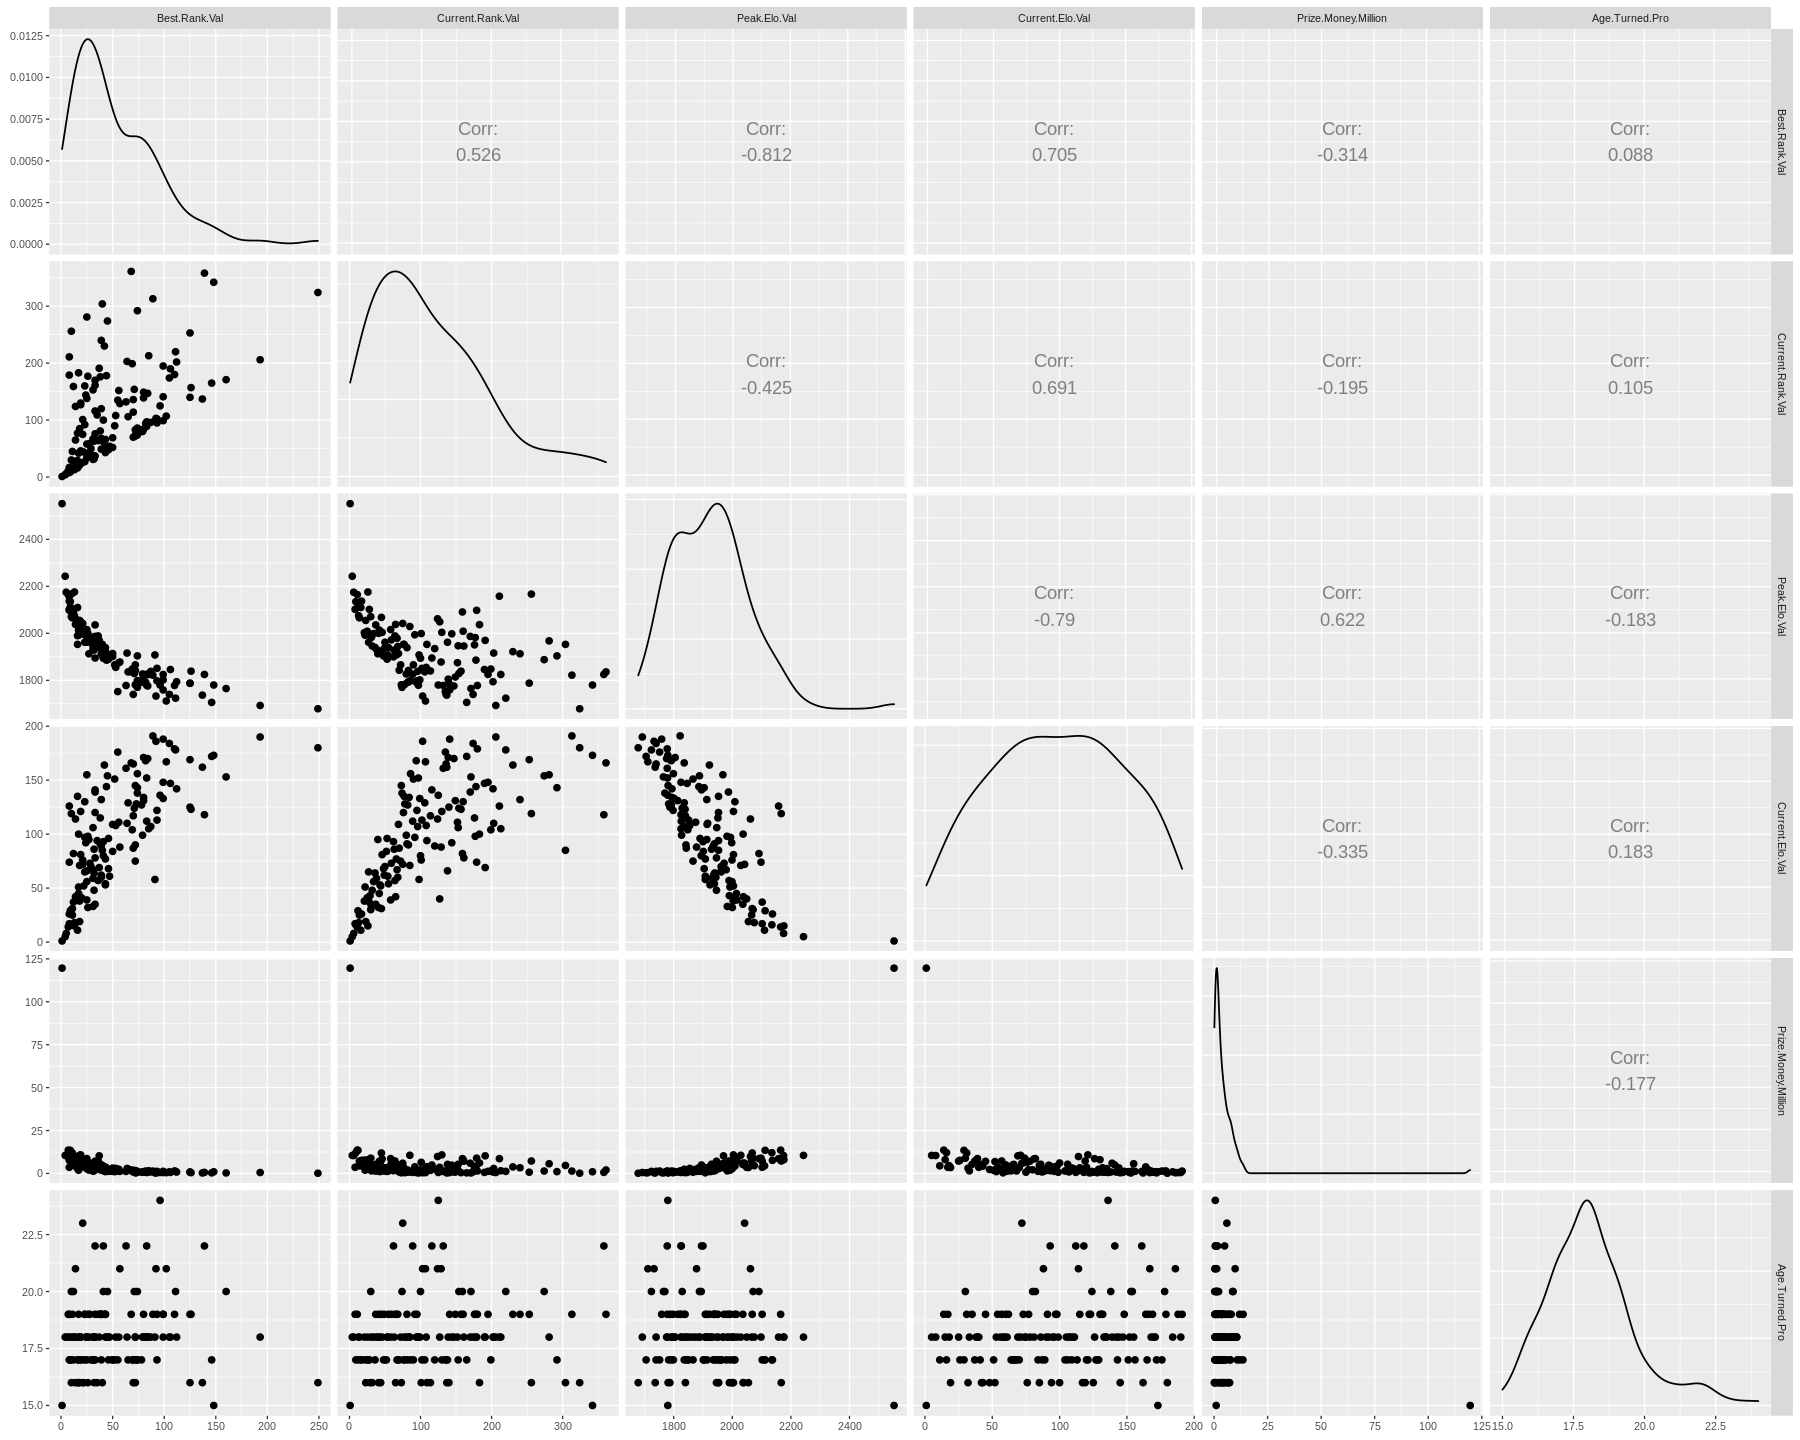

In [7]:
#Look at potential correlation between data
options(repr.plot.width = 15, repr.plot.height = 12)
ggpairs(player_data_cleaned, 
        lower = list(combo = wrap("facethist", binwidth = 20)))+ 
        theme_grey(base_size = 8) 

<i>Figure 1 : GGPairs of original tidied dataset</i>

The dataset was inspected, and the number of data points for each label was counted. 

In [8]:
#Counting the number of labels for our classification
age_count <- player_data_cleaned %>%
             group_by(Age.Turned.Pro) %>%
             summarize(n = n()) %>%
             arrange(desc(n)) 
age_count

`summarise()` ungrouping output (override with `.groups` argument)



Age.Turned.Pro,n
<dbl>,<int>
18,46
17,31
19,27
16,16
20,8
22,5
21,4
15,2
23,1


<i>Table 2.2.1 : Count of items in each label of the column Age.Turned.Pro</i>

There were 10 different labels for Age.Turned.Pro, ranging from age 15 to 24. Upon review, it was clear that most of the data was centered around the ages 16-19. The data points from other ages were very rare in the dataset. This could have potentially led to a very low classifier accuracy when predicting those rare labels. <br>

To work around this problem, the 10 labels were grouped into 3 categories: <br>
<b>Category 0 (15 -17) <br>
Category 1 (18) <br>
Category 2 (19+) </b><br>

In [9]:
#Grouping age labels together
player_data_15_17 <-  player_data_cleaned %>% #Category 0: Ages 15-17
                        filter(Age.Turned.Pro %in% (15:17)) %>%
                        mutate(Age.Turned.Pro = 0)

player_data_18 <-  player_data_cleaned %>% #Category 1: Age 18
                        filter(Age.Turned.Pro == (18)) %>%
                        mutate(Age.Turned.Pro = 1)

player_data_20_plus <-  player_data_cleaned %>% #Category 2: Age 20+
                        filter(Age.Turned.Pro > 18) %>%
                        mutate(Age.Turned.Pro = 2)
 
player_data_cleaned <- rbind(player_data_15_17,player_data_18) %>% #Adding all the 3 DFs back together
                        rbind(player_data_20_plus)


head(player_data_cleaned)
tail(player_data_cleaned)

Best.Rank.Val,Current.Rank.Val,Peak.Elo.Val,Current.Elo.Val,Prize.Money.Million,Age.Turned.Pro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,183,2037,100,6.091971,0
17,22,1992,51,1.893476,0
19,130,2004,121,10.821168,0
9,12,2112,29,13.470614,0
23,27,1962,65,4.850190,0
32,32,1946,48,2.301746,0


Best.Rank.Val,Current.Rank.Val,Peak.Elo.Val,Current.Elo.Val,Prize.Money.Million,Age.Turned.Pro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,75,2042,72,5.970907,2
89,313,1822,191,1.384826,2
39,49,1936,62,3.128654,2
45,274,1888,154,1.411268,2
102,107,1712,167,0.475660,2
92,103,1733,186,0.414637,2


<i>Table 2.2.2 : Categorization complete </i>

Age.Turned.Pro was then turned into a factor so it can be used in our classification analysis as a label.

In [10]:
#Turning Age.Turned.Pro into a factor 
player_data_cleaned_final <- player_data_cleaned %>% 
                        mutate(Age.Turned.Pro = as_factor(Age.Turned.Pro))
head(player_data_cleaned_final)
tail(player_data_cleaned_final)

Best.Rank.Val,Current.Rank.Val,Peak.Elo.Val,Current.Elo.Val,Prize.Money.Million,Age.Turned.Pro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17,183,2037,100,6.091971,0
17,22,1992,51,1.893476,0
19,130,2004,121,10.821168,0
9,12,2112,29,13.470614,0
23,27,1962,65,4.850190,0
32,32,1946,48,2.301746,0


Best.Rank.Val,Current.Rank.Val,Peak.Elo.Val,Current.Elo.Val,Prize.Money.Million,Age.Turned.Pro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
21,75,2042,72,5.970907,2
89,313,1822,191,1.384826,2
39,49,1936,62,3.128654,2
45,274,1888,154,1.411268,2
102,107,1712,167,0.475660,2
92,103,1733,186,0.414637,2


<i>Table 2.2.3 : Age.Turned.Pro is now a factor</i>

### 3.Visualization of Dataset

In [11]:
#Number of players in each category
age_count_final <- player_data_cleaned_final %>%
             group_by(Age.Turned.Pro) %>%
             summarize(n = n()) %>%
             arrange(desc(n)) 
age_count_final

`summarise()` ungrouping output (override with `.groups` argument)



Age.Turned.Pro,n
<fct>,<int>
0,49
1,46
2,46


<i>Table 2.2.4: Number of Players in each age category</i>

A bar chart was plotted to further visualize our dataset. It shows the number of players in each label of Age.Turned.Pro, giving us a brief overview of our sample size and potential predictability of each category. 

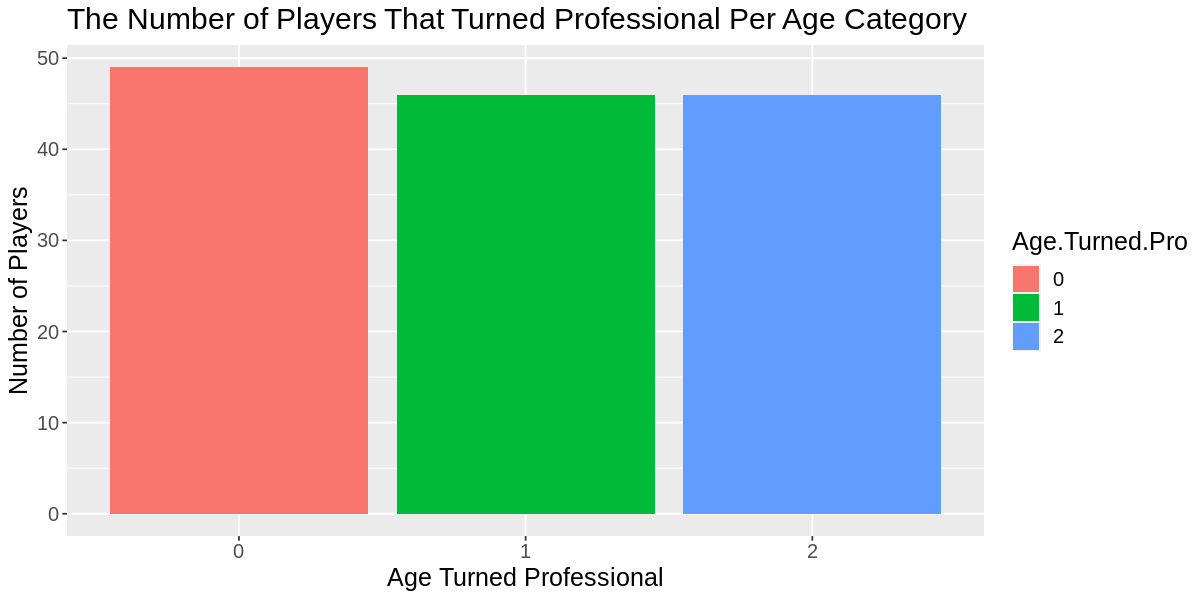

In [12]:
options(repr.plot.width = 10, repr.plot.height = 5)
#Quick glance at amount of data to work with
age_bar <- ggplot(player_data_cleaned_final, aes(x = Age.Turned.Pro, fill = Age.Turned.Pro)) + 
                 geom_bar(position = "identity") +
                 labs(x = "Age Turned Professional", y = "Number of Players", color = "Age Category") +
                 theme(text = element_text(size=15)) + 
                 ggtitle('The Number of Players That Turned Professional Per Age Category')

age_bar


<i>Figure 2 : A plot of the number of players in each age category</i>

To further visualize the relationship between the predictors and the label, Age.Turned.Pro, a histogram was plotted for each predictor.

In [13]:
# Histogram visualizing Prize.Money.Val for each age category
options(repr.plot.width = 30, repr.plot.height = 5)
age_hist_prize_money_earned <- player_data_cleaned_final %>%
            ggplot(aes(x = Prize.Money.Million, fill = Age.Turned.Pro)) +
            geom_histogram(position =  "identity", bins = 20) +
            facet_wrap(Age.Turned.Pro ~ .) +
            ggtitle("Total Prize Money Earned by Tennis Players Per Age Category") +
             labs(x = 'Total Prize Money Earned(Million Dollars)', y = 'Number of Players', fill = 'Age Category') + 
            theme(text = element_text(size = 25))

In [14]:
# Histogram visualizing Best.Rank.Val for each age category
options(repr.plot.width = 0, repr.plot.height = 5)
age_hist_best_rank <- player_data_cleaned_final %>%
            ggplot(aes(x = Best.Rank.Val, fill = Age.Turned.Pro)) +
            geom_histogram(position = "identity",  bins = 10) +
            facet_wrap(Age.Turned.Pro ~ .) +
               ggtitle("Best Rank For Tennis Players Per Age Category") +
            labs(x = 'Best Rank Achieved', y = 'Number of Players', fill = 'Age Category') + 
            theme(text = element_text(size = 25))

In [15]:
# Histogram visualizing Current.Rank.Val for each age category
options(repr.plot.width = 20, repr.plot.height = 5)
age_hist_current_rank <- player_data_cleaned_final %>%
            ggplot(aes(x = Current.Rank.Val, fill = Age.Turned.Pro)) +
            geom_histogram(position = "identity",  bins = 10) +
            facet_wrap(Age.Turned.Pro ~ .) +
            ggtitle("Current Rank For Tennis Players Per Age Category") +
            labs(x = 'Current Ranking', y = 'Number of Players', fill = 'Age Category') + 
            theme(text = element_text(size = 25))

In [16]:
# Histogram visualizing Peak.Elo.Val for each age category
options(repr.plot.width = 20, repr.plot.height = 5)
age_hist_peak_elo_rank <- player_data_cleaned_final %>%
            ggplot(aes(x = Peak.Elo.Val, fill = Age.Turned.Pro)) +
            geom_histogram(position = "identity",  bins = 5) +
            facet_wrap(Age.Turned.Pro ~ .) +
            ggtitle("Peak Elo Rating For Tennis Players Per Age Category") +
            labs(x = 'Peak Elo Ranking', y = 'Number of Players', fill = 'Age Category') + 
            theme(text = element_text(size = 25))

In [17]:
# Histogram visualizing Current.Elo.Val for each age category
options(repr.plot.width = 20, repr.plot.height = 5)
age_hist_current_elo_rank <- player_data_cleaned_final %>%
            ggplot(aes(x = Current.Elo.Val, fill = Age.Turned.Pro)) +
            geom_histogram(position = "identity",  bins = 10) +
            facet_wrap(Age.Turned.Pro ~ .) +
            ggtitle("Current Elo Rank For Tennis Players Per Age Category") +
            labs(x = 'Current Elo Ranking', y = 'Number of Players', fill = 'Age Category') + 
            theme(text = element_text(size = 25))

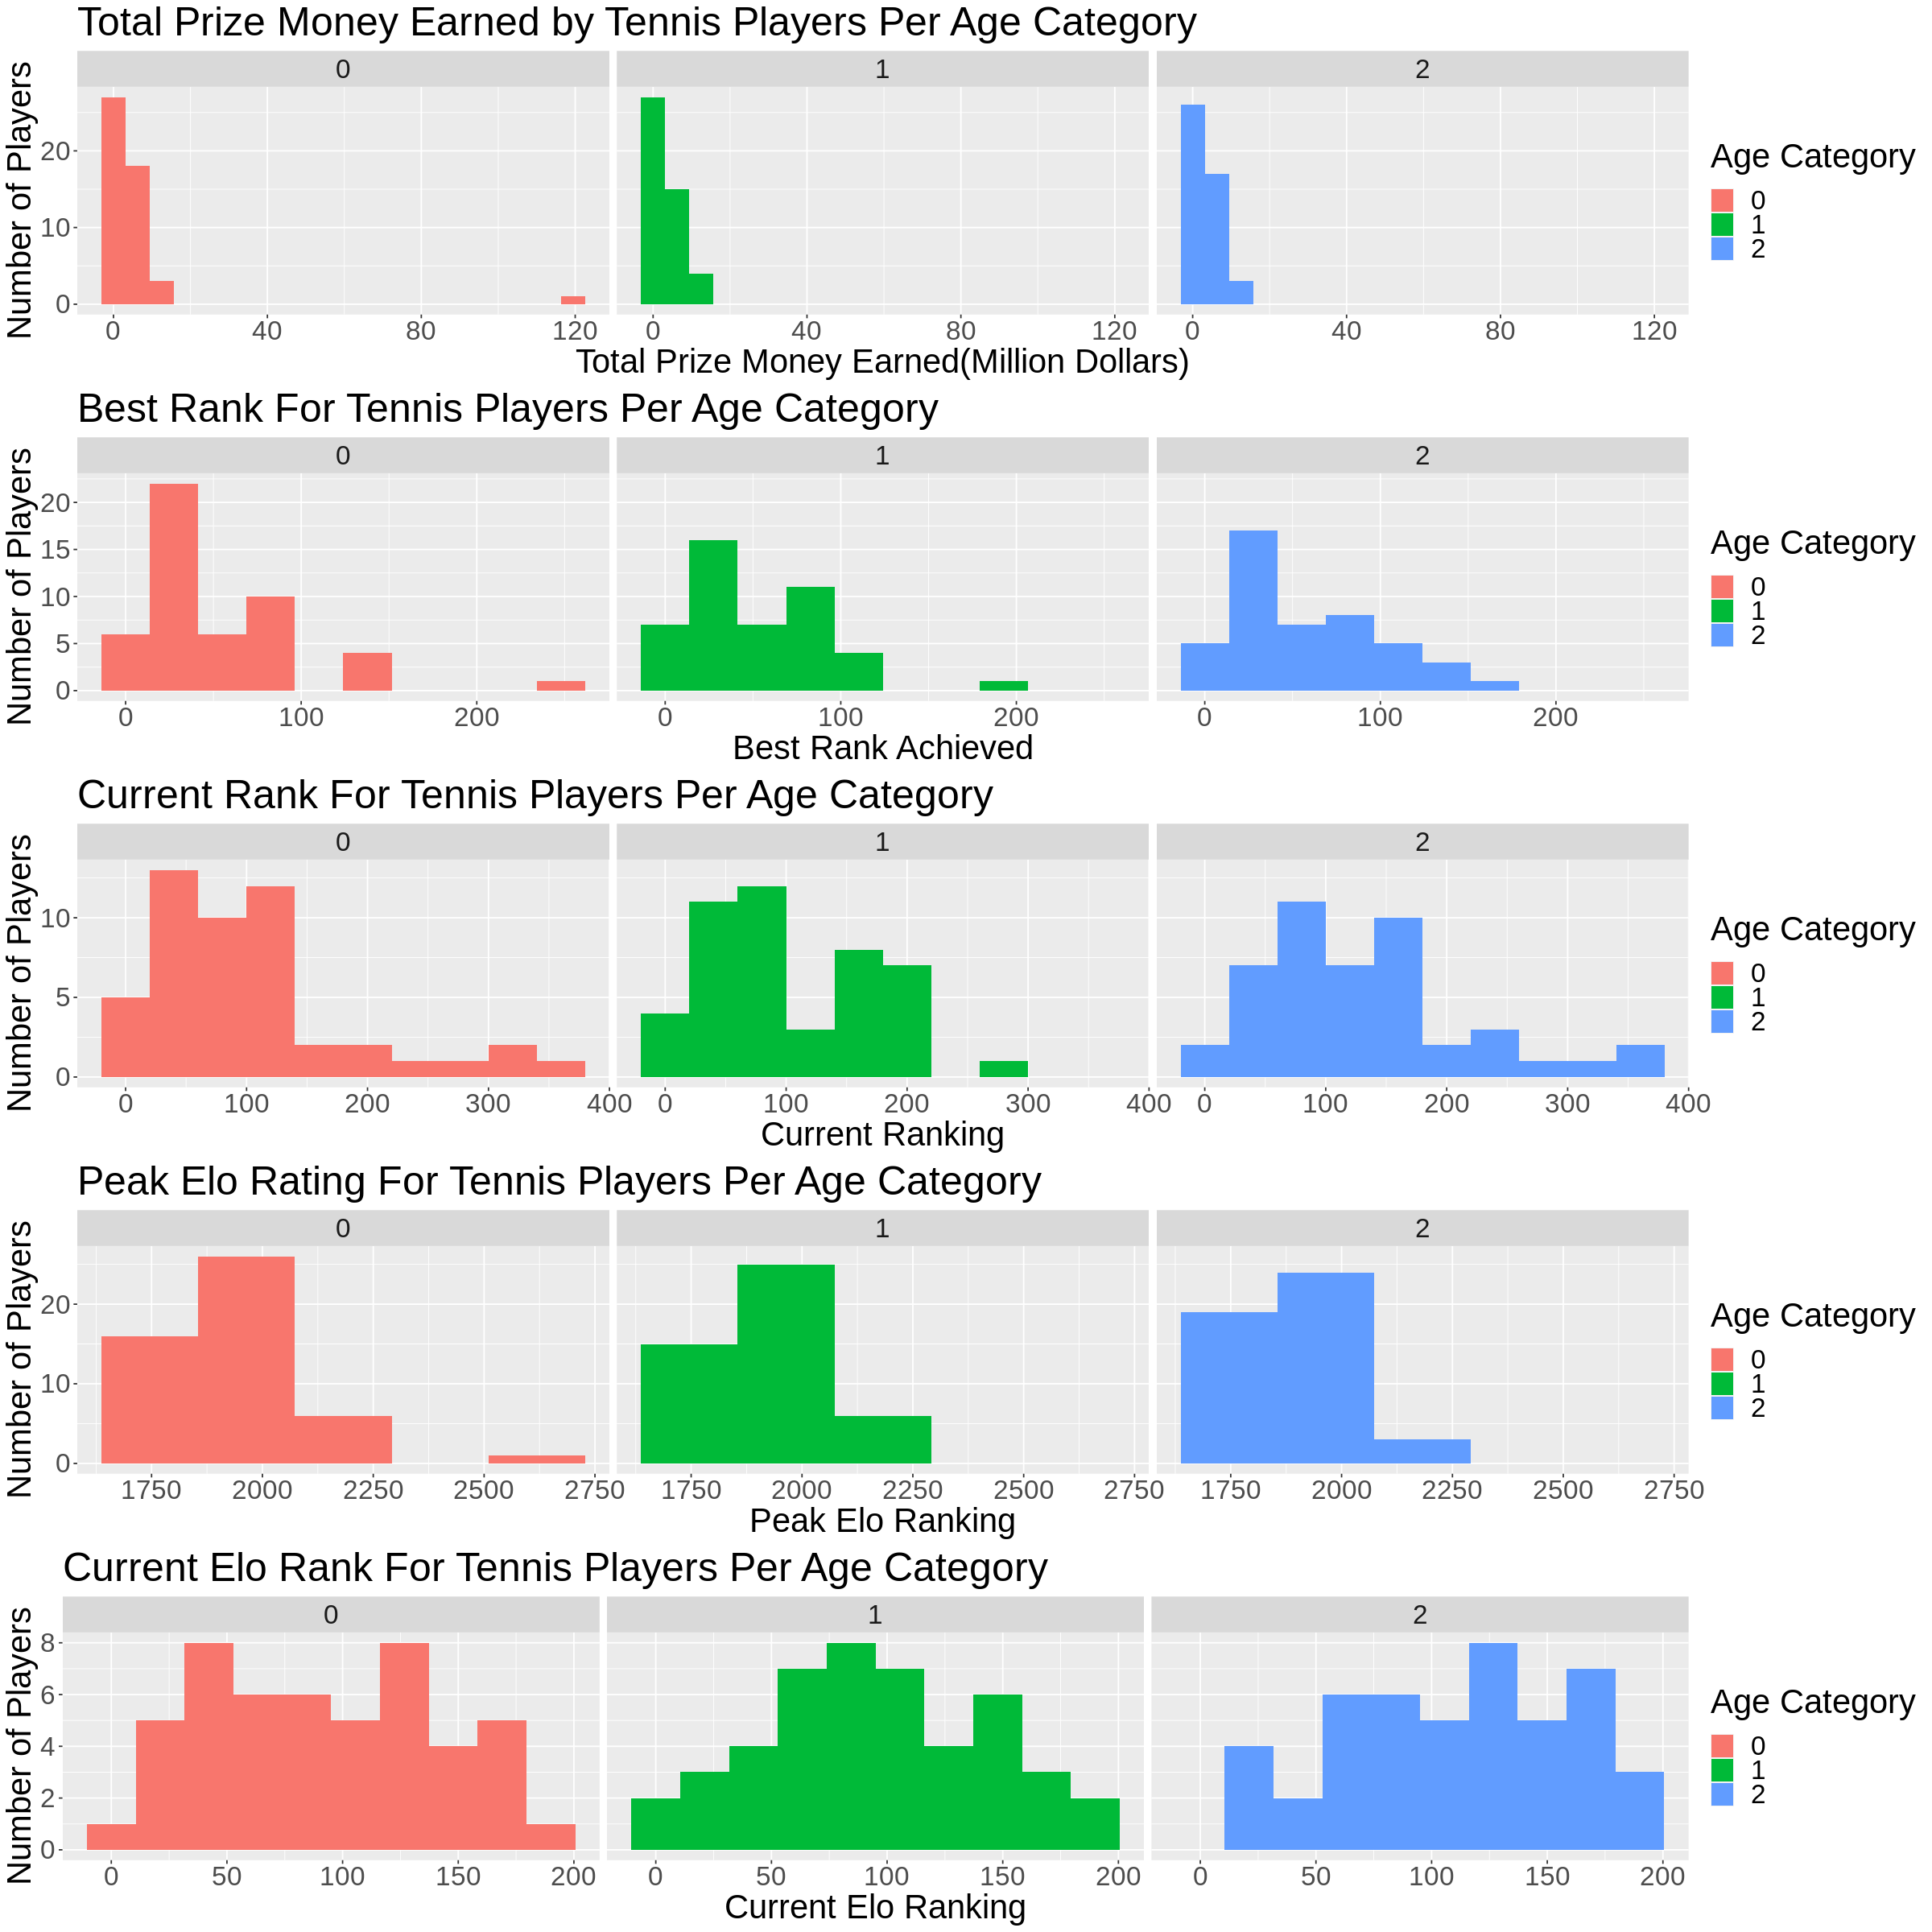

In [18]:
#Plots all the histograms under each other
options(repr.plot.width = 20, repr.plot.height = 20)
grid.arrange(age_hist_prize_money_earned, age_hist_best_rank, 
             age_hist_current_rank, age_hist_peak_elo_rank, 
             age_hist_current_elo_rank, ncol=1) 

<i>Figure 3 : Histogram of each predictor for each category of the label Age.Turned.Pro</i>

### 4. Classification

Classification was chosen for the analysis because the categorical variable(label), Age.Turned.Pro,is being predicted using many quantitative predictors(features). Although Age.Turned.Pro also represents a quantitative value, we are considering it as categorical due to the fact that our number of labels is so small, and age in this context represents a category. 

#### Splitting the data into a training and testing set

Firstly, the data is partitioned into a training (80%) and testing (20%) set to be used in our classification. The variable Age.Turned.Pro is our class label.

In [19]:
#Splitting into training and test data sets
player_split <- initial_split(player_data_cleaned_final, prop = 4/5, strata = Age.Turned.Pro) #Age.Turned.Pro as label
player_train <- training(player_split) #training dataset
player_test <- testing(player_split)  #testing dataset


glimpse(player_train)
glimpse(player_test)

Rows: 114
Columns: 6
$ Best.Rank.Val       <dbl> 17, 19, 23, 32, 40, 26, 1, 65, 9, 70, 72, 31, 70,…
$ Current.Rank.Val    <dbl> 22, 130, 27, 32, 304, 41, 1, 106, 9, 136, 73, 67,…
$ Peak.Elo.Val        <dbl> 1992, 2004, 1962, 1946, 1953, 2000, 2552, 1836, 2…
$ Current.Elo.Val     <dbl> 51, 121, 65, 48, 85, 32, 1, 129, 16, 165, 145, 67…
$ Prize.Money.Million <dbl> 1.893476, 10.821168, 4.850190, 2.301746, 4.660132…
$ Age.Turned.Pro      <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 27
Columns: 6
$ Best.Rank.Val       <dbl> 17, 9, 125, 16, 50, 73, 137, 8, 35, 43, 18, 11, 3…
$ Current.Rank.Val    <dbl> 183, 12, 140, 16, 52, 78, 137, 17, 109, 43, 85, 1…
$ Peak.Elo.Val        <dbl> 2037, 2112, 1787, 2110, 1901, 1783, 1737, 2137, 1…
$ Current.Elo.Val     <dbl> 100, 29, 125, 11, 84, 128, 162, 26, 94, 53, 71, 2…
$ Prize.Money.Million <dbl> 6.091971, 13.470614, 0.849099, 4.442257, 1.226242…
$ Age.Turned.Pro      <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1…


<i>Table 2.4.1 : Training and Testing Datasets</i>

#### Pre-processing the data

Using only the training data, the predictors are standardized, and a recipe is constructed.

In [20]:
# Recipe for training data
tennis_recipe <- recipe(Age.Turned.Pro ~ Best.Rank.Val + Current.Rank.Val+  Peak.Elo.Val+ Current.Elo.Val+ Prize.Money.Million, data = player_train)%>%
                step_scale(all_predictors()) %>% #standardization of predictors
                step_center(all_predictors()) 
                
tennis_recipe 

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

#### Training the classifier

A K-nearest neighbour classifier is created using the training set only. To maximize the performance of our classifier, we split the training set further into two subsets: a training set and validation set, then perform 10-fold cross-validation. The new training set is used for building the classifier, and the validation set is used for evaluating the classifier. 

In [21]:
#This is the model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% #tuning the model
            set_engine("kknn") %>%
            set_mode("classification")
knn_spec


#10-fold cross_validation
tennis_vfold <- vfold_cv(player_train, v = 10, strata = Age.Turned.Pro)


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We then created our data-analysis workflow to fit the knn model and recipe, and run the cross-validation. 

In [ ]:
#Fitting the knn model and running the cross_validation
tennis_results <- workflow() %>%
                add_recipe(tennis_recipe) %>%
                add_model(knn_spec) %>%
                tune_grid(resamples = tennis_vfold, grid = 10) %>% #specifies that the tuning
                                                                    #should try 10 values of K when tuning.
                collect_metrics() # aggregates the mean and SE of the classifier’s validation accuracy across the folds
tennis_results

<i>Table 2.4.2 : Data Analysis Results</i>

#### K-value Selection

Here, we select the K value that yields the highest accuracy to build the model for the overall training data. We do this by plotting accuracy-vs-k.

In [ ]:
#Filtering for accuracy
tennis_accuracy <- tennis_results %>%
                filter (.metric == "accuracy")
tennis_accuracy


<i>Table 2.4.3: Accuracy for each K value</i>

In [ ]:
#Plot of Accuracy vs K
options(repr.plot.width = 15 , repr.plot.height = 10)
accuracy_vs_k <- ggplot(tennis_accuracy, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
     ggtitle("Accuracy vs. K") +
    scale_x_continuous(breaks = c(1:20)) +
    theme(text = element_text(size = 20))
accuracy_vs_k

<i>Figure 4: Plot of Accuracy vs. K</i>

The K value we chose to use for our model is 7. It maximizes the validation accuracy without n being too high.


#### Building the Classifier Model Using K = 7

Now, we rebuild the model using K = 7. We then proceed to fit our new model and recipe.

In [ ]:
#New model using K=7
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) %>%
            set_engine("kknn") %>%
            set_mode("classification")
knn_spec_new

#Fitting the model and recipe into a data analysis workflow
tennis_results_new <- workflow() %>%
                add_recipe(tennis_recipe) %>%
                add_model(knn_spec_new) %>%
                fit(data = player_train) 
tennis_results_new

#### Evaluating the Accuracy of The Classifier

Since the classifier model was built and trained using the training data, it can now be used  to predict the class labels for our test set.

In [ ]:
#Predict the labels in the test set
tennis_test_predictions <- predict(tennis_results_new, player_test) %>%
                            bind_cols(player_test)
tennis_test_predictions

<i>Table 2.4.4: Predictions of the label Age.Turned.Pro for the test dataset</i>

#### Computing The Accuracy of The Classifier

Here, we assess the classifier's accuracy. The classifier's accuracy on the test data is 22.22%. 

In [ ]:
#Compute the accuracy
tennis_test_predictions %>%
    metrics(truth = Age.Turned.Pro, estimate = .pred_class)

<i>Table 2.4.5 : Calculated Classifier Accuracy</i>

The classifier labelled 6 observations correctly, and 21 observations incorrectly, matching our accuracy rate.

In [ ]:
#Confusion Matrix
tennis_test_predictions %>%
        conf_mat(truth= Age.Turned.Pro, estimate = .pred_class) 

<i>Figure 5: Confusion Matrix</i>

## 3) Discussion

### Summary of Findings

Using a K-NN classification model, we were able to predict the age at which a tennis player turned professional based on the ranks they achieved and the amount of prize money they won, with a <b>classifier accuracy of 22.22%</b>. This value is quite low. The correlation between each individual predictor and the label is relatively weak as well, although it is positive. This is seen in the ggpairs plot of each individual predictor against the label, the histograms illustrating the distribution of players for each predictor according to the age category, and the confusion matrix showing the result of our predictions on the testing data.


### Comparison of Expected Findings and Actual Findings


We expected that turning professional at a younger age will make a tennis player more successful in their career, in terms of the amount of prize money won and rankings achieved, and that the correlation would be quite strong. Our conclusion does still align with our original hypothesis that claimed that the ranks achieved and prize money earned by a player correlates with turning professional at a younger age. This relationship was ultimately much weaker than what we expected. There was no one particular predictor that was able to drastically drive the prediction and classification of the label.

### KNN - Classification Analysis 

In performing our K-NN classification study, we initially only used the predictors Best.Rank.Val(value of best rank), Peak.Elo.Val(highest elo rank value), and Prize.Money.Val(value of prize money) to predict the age at which a tennis player turned professional.<br>

At first, when inspecting the data, we found out that the low accuracy was due to the presence of so many labels of Age.Turned.Pro (10 labels ranging from 15 to 24), some of which had very little data points, such as ages 15 and 21-24, as they were very rare in the dataframe. Since their occurrences made up a minority of the data, the K-NN classification algorithm always predicted their label wrong, also reflected in the confusion matrix. These incorrect predictions were also confirmed in the confusion matrix. <br>

In order to increase the accuracy of our model, we chose to include additional predictors because a greater number of predictors increase the accuracy of the classification. The additional predictors we chose to include were Current.Rank.Val (value of current rank) and Current.Elo.Val(value of current elo rank). We also changed the split value to 80 and training and 20% testing to provide our model with more training data to improve its performance.<br>

To account for the rare occurrences of some labels, we first tried upsampling the data; however it did not properly address the issues as we still didn’t have enough data points for some of the labels e.g. age 22. To work around this problem, we reduced the original 10 labels into three categories, by combining all the ages from 15 to 17 into category 0, (teenage years), age 18 into category 1 (legal age; since 18 is the legal age in most countries), and age 19 and above into category 2 (young adults).<br>

### K value and Accuracy of the KNN Model Analysis 


After plotting the accuracy against K, we chose a K-value of 7 neighbours, because it gives the highest accuracy, although the accuracy is not stable, as it drastically decreases when compared to neighbouring k values. When k = 7, the model has an accuracy of 38% on the validation set, however it scored only 22% accuracy on the testing data. A drop in accuracy in this case is expected, as accuracy usually decreases when the model is used to predict the testing data. However, a drop of 16% in accuracy from 38% to 22% could be due to some overfitting as we picked the number of neighbours to be 7, which is not a small number. Overfitting causes the model to be sensitive to noise in the training set and decreases the accuracy of predicting the testing data. 

### Histogram Analysis

A closer inspection of each of the predictors and the distribution of players across these predictors for each age category provides some insight about the accuracy of our K-NN classification model.<br>

In the Figure 3 histograms showing the amount of prize money earned by tennis players per age category, while the majority of players won less than 20M dollars, a very small number of players won prize money of value about 120M dollars. This small number of players all belongs to category 0 of our study, which are players that turned professional at ages 15-17, the youngest age category. This observation may appear as a statistical anomaly; however, the top 10 or 20 ranked players on the Association of Tennis Professionals earn about 90% of the total income out of all the players (C., 2019).<br>

In the histograms showing distribution of players for predictors relevant to rank per age category (Best Rank Achieved and Current Rank Achieved), the smaller number on the x-axis indicates a higher rank achieved. In these histograms, it appears more players from category 0 or 1 achieved higher ranks, and more players from category 2 achieved lower ranks. However, there is no distinct distribution of players for each age category; there is no strong correlation between any of the predictors and the age a player turns professional. This may explain the accuracy of our K-NN classification model, as it is difficult for the model to distinguish between the 3 categories based on the predictors we chose. 

This further suggests that there may be other factors that can be used to predict the age a player turns professional outside the database of this study. 

### Impact of Findings 

Overall, our conclusion ended up being consistent with other studies. A study meant to assist pondering tennis players on whether or not to pursue college full time or turn professional supports the decision to acquire a college education and states that a tennis player that achieved success in their career did not necessarily turn professional before the age of 18, 19 (Russell, 2010). This is because age turned professional doesn’t have a particularly strong impact on success, as the correlation between the measures of success and the age at which you turn professional is relatively weak. Despite this, it can lead certain parents to encourage their kids to start playing earlier as turning  professional does positively correlate to some measures of success, even though it is not extremely strong. 

### Further questions

Our findings should raise further questions.<br>
For example: <br>
<b>1.Out of all the tennis players that turned professional at a younger age, what percentage became successful? <br>
2.How does turning pro at an early age affect a player’s life and success outside of tennis?</b> <br>

## 4) References

Barnes, J. (2020, August 26). How to Turn Pro in Tennis. Tennis Racquet Central. https://tennisracquetcentral.com/how-to-turn-pro-in-tennis/

C. (2019, May 14). Entry-Level Pro Tennis Today Faces a Difficult Problem. Fortunately it is One That Has Already Been Solved. Cracked Racquets | Covering Tennis News Through Podcasting, Social Networking, and Digital Publications.
https://www.crackedracquets.com/solving-entry-level-pro-tennis-190514/<br>

Jeff, A. (2019, December 3). An Introduction to Tennis Elo. Heavy Topspin. http://www.tennisabstract.com/blog/2019/12/03/an-introduction-to-tennis-elo/<br>

Russell, T. (2010, October). Going to College or Turning Pro? Making an Informed Decision! http://www.uscollegeshowcaseasia.com/wp-content/uploads/2016/09/going-to-college-or-turning-pro.pdf<br>

UltimateTennisStatistics. (2020). Ultimate Tennis Statistics. https://www.ultimatetennisstatistics.com/